## Code Injection Experiments

First experiments are underway! Exciting!

**Main Idea**: Find (or inject) a function *F* such that it exists in some fraction of the corpus applications. Extract fingerprints from all functions in corpus, separate into test/train, and strip labels from test set. Use a classification method like kNN to classify unlabeled fingerprints in test-set as *F* or *not-F*

*Further exploration*: perform similar analysis to those conducted in `01_exploring_crossarch`, like checking if code-identical functions are also fingerprint-identical, etc.

### Dataset Building: coreutils
**WARNING: BEFORE USING COREUTILS IN A PAPER...** Remember that a previous related paper was largely invalidated due to coreutils-related corpus-taint. Double-check to make sure this doesn't happen here



In [5]:
import ace
import pandas as pd
import time
import os

profiles=[]
runtimes={}
with os.scandir("../res/cu-clean/") as dir_entry:
    for entry in dir_entry:
        if entry.is_file():
            start = time.monotonic()
            print("Profiling {} ({} KB)".format(entry.name, entry.stat().st_size//1000))
            profiles.append(ace.full_profile(entry.path, threads = 8, ins_sort = True, src_only = True, src_path = "/home/ubuntu/ace/dataset-gen/coreutils/coreutils-8.28"))
            runtimes[entry.path] = time.monotonic() - start

Profiling ls (626 KB)
Profiling ln (351 KB)
Profiling sleep (163 KB)
Profiling id (204 KB)
Profiling hostid (148 KB)
Profiling unexpand (175 KB)
Profiling pwd (164 KB)
Profiling chmod (280 KB)
Profiling logname (148 KB)
Profiling true (144 KB)
Profiling dircolors (190 KB)
Profiling base32 (188 KB)
Profiling expand (173 KB)
Profiling dd (343 KB)
Profiling tac (183 KB)
Profiling od (318 KB)
Profiling mktemp (215 KB)
Profiling csplit (234 KB)
Profiling printenv (146 KB)
Profiling whoami (148 KB)
Profiling chroot (187 KB)
Profiling truncate (176 KB)
Profiling sync (155 KB)
Profiling sort (548 KB)
Profiling link (148 KB)
Profiling dirname (149 KB)
Profiling df (423 KB)
Profiling cat (174 KB)
Profiling stat (381 KB)
Profiling du (491 KB)
Profiling md5sum (205 KB)
Profiling wc (223 KB)
Profiling stty (292 KB)
Profiling mkdir (406 KB)
Profiling sha384sum (289 KB)
Profiling shuf (292 KB)
Profiling uname (154 KB)
Profiling cksum (160 KB)
Profiling sha1sum (224 KB)
Profiling chcon (300 KB)
Profil

In [7]:
cu_clean = pd.concat(profiles, ignore_index=True)
cu_clean

,binary,function,address,length,src_path,src_line,src_code,attributor,raw_bytes,fingerprint
0,../res/cu-clean/ls,__argmatch_die,49856,10,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,62.0,__argmatch_die (void)\n{\n ARGMATCH_DIE;\n}\n,nm-t,b'\xbf\x01\x00\x00\x00\xe9f\xf8\xff\xff',"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,../res/cu-clean/ls,__strftime_internal,67264,6375,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,446.0,"__strftime_internal (STREAM_OR_CHAR_T *s, STRF...",nm-t,b'AWAVI\x89\xffAUATH\x8d\x05\x98u\x00\x00USI\x...,"[12, 1, -2147483648, -134217728, 0, 1, -214748..."
2,../res/cu-clean/ls,__xargmatch_internal,50576,109,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,176.0,"__xargmatch_internal (const char *context,\n ...",nm-T,b'AWAVI\x89\xfeAUATI\x89\xf4USH\x89\xcdH\x89\x...,"[8, -2147483647, -2147483648, 0, -2147483647, ..."
3,../res/cu-clean/ls,_obstack_allocated_p,87568,56,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,241.0,"_obstack_allocated_p (struct obstack *h, void ...",nm-T,b'H\x8bG\x08H\x85\xc0t-\x0f\x1f\x80\x00\x00\x0...,"[1, -2147483647, 0, 0, 38505, 0, 0, 0, 0, 0, 0..."
4,../res/cu-clean/ls,_obstack_begin,87264,17,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,150.0,"_obstack_begin (struct obstack *h,\n ...",nm-T,b'\x80gP\xfeH\x89O8L\x89G@\xe9_\xff\xff\xff',"[63, -2147483647, 64, 0, 0, 64, 4, 2406, 64, 8..."
...,...,...,...,...,...,...,...,...,...,...
9263,../res/cu-clean/head,xrealloc,24592,54,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,51.0,"xrealloc (void *p, size_t n)\n{\n if (!n && p...",nm-T,b'H\x85\xf6SH\x89\xf3u\x05H\x85\xffu\x1aH\x89\...,"[0, -2147483647, 1, 0, 38505, 1, 0, 0, 0, 0, 1..."
9264,../res/cu-clean/head,xstrdup,25056,19,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,119.0,xstrdup (char const *string)\n{\n return xmem...,nm-T,b'SH\x89\xfb\xe8\xc7\xb6\xff\xffH\x89\xdfH\x8d...,"[-1, -2147483647, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
9265,../res/cu-clean/head,xstrtoumax,25456,1052,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,88.0,"__xstrtol (const char *s, char **ptr, int strt...",nm-T,b'AWAVAUATUSH\x83\xec(dH\x8b\x04%(\x00\x00\x00...,"[36, -2147483647, -2147483648, -134217728, 0, ..."
9266,../res/cu-clean/head,xwrite_stdout.part.6,11968,120,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,179.0,"xwrite_stdout (char const *buffer, size_t n_by...",nm-t,"b""USH\x89\xf2H\x89\xf3\xbe\x01\x00\x00\x00H\x8...","[8, -2147483647, -2145357361, 0, 0, -214535736..."


In [9]:
# Careful not to accidentally overwrite something!
# cu_clean.to_pickle("cu_clean.df.p")

Text(0, 0.5, 'Time to fingerprint all functions (sec)')

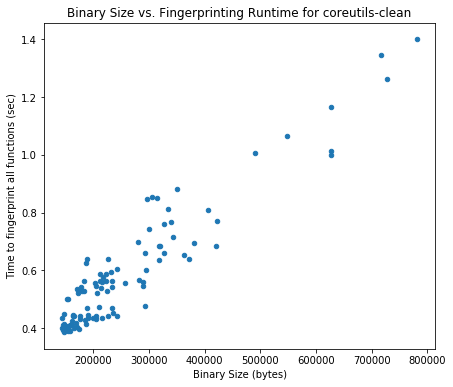

In [43]:
# Quick Runtime Analysis
%matplotlib inline
runtimes_df = pd.DataFrame.from_dict(runtimes, orient='index', columns=['runtime'])
runtimes_df['bin_size'] = [os.path.getsize(x) for x in runtimes_df.index]
runtime_plt = runtimes_df.plot.scatter("bin_size", "runtime", figsize=(7,6), 
                                       title="Binary Size vs. Fingerprinting Runtime for coreutils-clean")
runtime_plt.set_xlabel("Binary Size (bytes)")
runtime_plt.set_ylabel("Time to fingerprint all functions (sec)")

## Preliminary Analysis

Let's look at code-identical functions

In [34]:
code_ident = cu_clean.duplicated(subset=['src_code'], keep=False)
display(cu_clean[code_ident])
display("{} out of {}: {:.2f}%".format(len(cu_clean[code_ident]), 
                                   len(cu_clean), 
                                   (len(cu_clean[code_ident])/len(cu_clean))*100))

,binary,function,address,length,src_path,src_line,src_code,attributor,raw_bytes,fingerprint
0,../res/cu-clean/ls,__argmatch_die,49856,10,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,62.0,__argmatch_die (void)\n{\n ARGMATCH_DIE;\n}\n,nm-t,b'\xbf\x01\x00\x00\x00\xe9f\xf8\xff\xff',"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,../res/cu-clean/ls,__strftime_internal,67264,6375,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,446.0,"__strftime_internal (STREAM_OR_CHAR_T *s, STRF...",nm-t,b'AWAVI\x89\xffAUATH\x8d\x05\x98u\x00\x00USI\x...,"[12, 1, -2147483648, -134217728, 0, 1, -214748..."
2,../res/cu-clean/ls,__xargmatch_internal,50576,109,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,176.0,"__xargmatch_internal (const char *context,\n ...",nm-T,b'AWAVI\x89\xfeAUATI\x89\xf4USH\x89\xcdH\x89\x...,"[8, -2147483647, -2147483648, 0, -2147483647, ..."
3,../res/cu-clean/ls,_obstack_allocated_p,87568,56,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,241.0,"_obstack_allocated_p (struct obstack *h, void ...",nm-T,b'H\x8bG\x08H\x85\xc0t-\x0f\x1f\x80\x00\x00\x0...,"[1, -2147483647, 0, 0, 38505, 0, 0, 0, 0, 0, 0..."
4,../res/cu-clean/ls,_obstack_begin,87264,17,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,150.0,"_obstack_begin (struct obstack *h,\n ...",nm-T,b'\x80gP\xfeH\x89O8L\x89G@\xe9_\xff\xff\xff',"[63, -2147483647, 64, 0, 0, 64, 4, 2406, 64, 8..."
...,...,...,...,...,...,...,...,...,...,...
9263,../res/cu-clean/head,xrealloc,24592,54,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,51.0,"xrealloc (void *p, size_t n)\n{\n if (!n && p...",nm-T,b'H\x85\xf6SH\x89\xf3u\x05H\x85\xffu\x1aH\x89\...,"[0, -2147483647, 1, 0, 38505, 1, 0, 0, 0, 0, 1..."
9264,../res/cu-clean/head,xstrdup,25056,19,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,119.0,xstrdup (char const *string)\n{\n return xmem...,nm-T,b'SH\x89\xfb\xe8\xc7\xb6\xff\xffH\x89\xdfH\x8d...,"[-1, -2147483647, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
9265,../res/cu-clean/head,xstrtoumax,25456,1052,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,88.0,"__xstrtol (const char *s, char **ptr, int strt...",nm-T,b'AWAVAUATUSH\x83\xec(dH\x8b\x04%(\x00\x00\x00...,"[36, -2147483647, -2147483648, -134217728, 0, ..."
9266,../res/cu-clean/head,xwrite_stdout.part.6,11968,120,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,179.0,"xwrite_stdout (char const *buffer, size_t n_by...",nm-t,"b""USH\x89\xf2H\x89\xf3\xbe\x01\x00\x00\x00H\x8...","[8, -2147483647, -2145357361, 0, 0, -214535736..."


'8681 out of 9268: 93.67%'

**Wow, so almost 94% of functions are groupwise code-identical.** Let's do a sanity check by seeing if we get similar numbers for source-path and byte-identicality

In [42]:
path_ident = cu_clean.duplicated(subset=['src_path', 'src_line'], keep=False)
display("Groupwise Path-identical: {} out of {} ({:.2f}%)".format(len(cu_clean[path_ident]), 
                                   len(cu_clean), 
                                   (len(cu_clean[path_ident])/len(cu_clean))*100))

byte_ident = cu_clean.duplicated(subset=['raw_bytes'], keep=False)
display("Groupwise Byte-identical: {} out of {} ({:.2f}%)".format(len(cu_clean[byte_ident]), 
                                   len(cu_clean), 
                                   (len(cu_clean[byte_ident])/len(cu_clean))*100))

code_byte_ident = code_ident & byte_ident
display("Code AND Byte-identical: {} out of {} ({:.2f}%)".format(len(cu_clean[code_byte_ident]), 
                                   len(cu_clean), 
                                   (len(cu_clean[code_byte_ident])/len(cu_clean))*100))

code_byte_path_ident = code_ident & byte_ident & path_ident
display("Code AND Byte AND path-identical: {} out of {} ({:.2f}%)".format(len(cu_clean[code_byte_path_ident]), 
                                   len(cu_clean), 
                                   (len(cu_clean[code_byte_path_ident])/len(cu_clean))*100))

'Groupwise Path-identical: 8676 out of 9268 (93.61%)'

'Groupwise Byte-identical: 3115 out of 9268 (33.61%)'

'Code AND Byte-identical: 3103 out of 9268 (33.48%)'

'Code AND Byte AND path-identical: 3103 out of 9268 (33.48%)'

Now let's look at the code that is fingerprint-identical AND byte-/code-identical (NOT groupwise)

...but we can't do that directly since `duplicated` doesn't work on non-hashable (i.e. list) types

In [52]:
cu_clean["fingerprint_tuple"] = cu_clean.fingerprint.apply(lambda x: tuple(x))

In [54]:
fingerprint_path_ident = cu_clean.duplicated(subset=['src_path', 'src_line','fingerprint_tuple'], keep=False)
display("Code-identical and fingerprint-identical: {} out of {} ({:.2f}%)".format(len(cu_clean[fingerprint_path_ident]), 
                                   path_ident.sum(), 
                                   (len(cu_clean[fingerprint_path_ident])/path_ident.sum())*100))

fingerprint_byte_ident = cu_clean.duplicated(subset=['raw_bytes', 'fingerprint_tuple'], keep=False)
display("Byte-identical and fingerprint-identical: {} out of {} ({:.2f}%)".format(len(cu_clean[fingerprint_byte_ident]), 
                                   byte_ident.sum(), 
                                   (len(cu_clean[fingerprint_byte_ident])/byte_ident.sum())*100))

'Code-identical and fingerprint-identical: 8386 out of 8676 (96.66%)'

'Byte-identical and fingerprint-identical: 3115 out of 3115 (100.00%)'

Promising... 100% byte-identical and fingerprint-identical is a good sanity check; same input should always produce same output. 96.6% code-identical and fingerprint-identical means that although there are some compiler variations happening, fingerprints are largely similar.

In [64]:
top_mask = cu_clean['src_path'] == "/home/ubuntu/ace/dataset-gen/coreutils/coreutils-8.28/lib/quotearg.c"
cu_clean[fingerprint_path_ident & top_mask]['src_line'].value_counts()

981.0     105
141.0     105
256.0     105
848.0     105
168.0     105
996.0     105
975.0     105
1066.0    105
948.0     105
961.0     105
954.0     105
1035.0    105
812.0     105
942.0     105
784.0     105
1008.0    105
1042.0    105
133.0     105
877.0     105
799.0     105
1078.0    105
1002.0    105
969.0     105
207.0     105
122.0     105
1025.0     20
Name: src_line, dtype: int64

In [122]:
cu_clean.groupby("src_code").filter(lambda g: (g.src_code.size >= 40) and (g.src_code.size <= 60)).function.unique()

array(['xstrtoul', 'xstrtoumax', 'xstrtoimax', 'xstrtol'], dtype=object)

In [139]:
instances = len(cu_clean[cu_clean.function == 'xstrtoumax'])
xstrtoumax_src = cu_clean[cu_clean.function == 'xstrtoumax'].src_code.loc[211]
code_ident_qty = cu_clean[cu_clean.function == 'xstrtoumax'].duplicated(subset=['src_code'], keep=False).sum()
byte_ident_qty = cu_clean[cu_clean.function == 'xstrtoumax'].duplicated(subset=['raw_bytes'], keep=False).sum()
display("{} instances out of {} are code-identical".format(code_ident_qty, instances))
display("{} instances out of {} are byte-identical".format(byte_ident_qty, instances))
display("{} unique variations on raw bytes".format(len(cu_clean[cu_clean.function == 'xstrtoumax'].raw_bytes.unique())))
display("{} unique variations on fingerprints".format(len(cu_clean[cu_clean.function == 'xstrtoumax'].fingerprint_tuple.unique())))
xstrtoumax_fingerprint = cu_clean[cu_clean.function == 'xstrtoumax'].fingerprint_tuple.unique()[0]
not_xstrtoumax = cu_clean.function != 'xstrtoumax'
has_fprint = cu_clean.fingerprint_tuple == xstrtoumax_fingerprint
display("{} other functions NOT named xstrtoumax have the same fingerprint".format(len(cu_clean[not_xstrtoumax & has_fprint])))
display("They are named: " + str(cu_clean[not_xstrtoumax & has_fprint].function.unique()))

'27 instances out of 27 are code-identical'

'3 instances out of 27 are byte-identical'

'25 unique variations on raw bytes'

'1 unique variations on fingerprints'

'24 other functions NOT named xstrtoumax have the same fingerprint'

"They are named: ['xstrtoul' 'xstrtoimax' 'xstrtol']"

**So this is really cool!** Looks like `xstrtoumax()` occurs in 27 binaries (all code-identically), and while most instances have their own unique raw_byte pattern, *all of them have the same fingerprint!*

So what's with those 24 other functions? See below

In [140]:
display("{} function are named xstrtoumax".format(len(cu_clean[cu_clean.function == 'xstrtoumax'])))
display("{} functions have the same source code as xstrtoumax".format(len(cu_clean[cu_clean.src_code == xstrtoumax_src])))
display("Names of those functions include " + str(cu_clean[cu_clean.src_code == xstrtoumax_src].function.unique()))

'27 function are named xstrtoumax'

'51 functions have the same source code as xstrtoumax'

"Names of those functions include ['xstrtoul' 'xstrtoumax' 'xstrtoimax' 'xstrtol']"

So in other words, it appears that there's a family of functions `xstrtoX()` that all share the same source code, but in many cases are compiled differently (i.e. have different raw-bytes). Nonetheless, they ALL have the same fingerprint!

# Actually do code injection

So let's actually give this injection business a shot. We'll try a math-y function with a bunch of `volatile`s (so they don't get optimized away) like:

```c
#include <stdlib.h>

int peaclab_do_math() {
    volatile int num;
    volatile int nabs;
    volatile int nexp;
    volatile div_t ndiv;
    volatile int result;
    
    num = rand() / (RAND_MAX/360);
    nabs = abs(num + 1);
    ndiv = div(nabs, 7);
    result = 2*(num * ndiv.quot) - nabs;
    
    return result;
}
```
Working inside `~/ace/dataset-gen/coreutils/coreutils-8.28-injected/src`, I manually injected this function into `cp`, `mv`, `ls`, `kill`, `yes`, `who`, `touch`, and `dd` using
```bash
for f in mv.c ls.c kill.c yes.c who.c touch.c dd.c; do cat ../peaclab_do_math.c >> $f; done
```
and then ran `cd .. && make -j10`. I confirmed the function made it into the binaries using:

```bash
for f in cp mv ls kill yes who touch dd; do gdb -q ./$f -ex "info address peaclab_do_math" -ex quit; done
```

Which returned:
```
Reading symbols from ./cp...done.
Symbol "peaclab_do_math" is a function at address 0x5c90.
Reading symbols from ./mv...done.
Symbol "peaclab_do_math" is a function at address 0x4ad0.
Reading symbols from ./ls...done.
Symbol "peaclab_do_math" is a function at address 0xc260.
Reading symbols from ./kill...done.
Symbol "peaclab_do_math" is a function at address 0x26a0.
Reading symbols from ./yes...done.
Symbol "peaclab_do_math" is a function at address 0x1f60.
Reading symbols from ./who...done.
Symbol "peaclab_do_math" is a function at address 0x3c00.
Reading symbols from ./touch...done.
Symbol "peaclab_do_math" is a function at address 0x3e60.
Reading symbols from ./dd...done.
Symbol "peaclab_do_math" is a function at address 0x6110.
```

In [144]:
profiles=[]
runtimes={}
with os.scandir("../res/cu-dirty/") as dir_entry:
    for entry in dir_entry:
        if entry.is_file():
            start = time.monotonic()
            print("Profiling {} ({} KB)".format(entry.name, entry.stat().st_size//1000))
            profiles.append(ace.full_profile(entry.path, threads = 8, ins_sort = True, src_only = True, src_path = "/home/ubuntu/ace/dataset-gen/coreutils/coreutils-8.28-injected"))
            runtimes[entry.path] = time.monotonic() - start
            
cu_dirty = pd.concat(profiles, ignore_index=True)
cu_dirty

Profiling ls (627 KB)
Profiling ln (351 KB)
Profiling sleep (163 KB)
Profiling id (204 KB)
Profiling hostid (148 KB)
Profiling unexpand (175 KB)
Profiling pwd (164 KB)
Profiling chmod (280 KB)
Profiling logname (148 KB)
Profiling true (144 KB)
Profiling dircolors (190 KB)
Profiling base32 (188 KB)
Profiling expand (173 KB)
Profiling dd (344 KB)
Profiling tac (184 KB)
Profiling od (318 KB)
Profiling mktemp (215 KB)
Profiling csplit (234 KB)
Profiling printenv (146 KB)
Profiling whoami (148 KB)
Profiling chroot (187 KB)
Profiling truncate (176 KB)
Profiling sync (155 KB)
Profiling sort (548 KB)
Profiling link (148 KB)
Profiling dirname (149 KB)
Profiling df (423 KB)
Profiling cat (174 KB)
Profiling stat (381 KB)
Profiling du (491 KB)
Profiling md5sum (205 KB)
Profiling wc (223 KB)
Profiling stty (292 KB)
Profiling mkdir (401 KB)
Profiling sha384sum (289 KB)
Profiling shuf (292 KB)
Profiling uname (154 KB)
Profiling cksum (160 KB)
Profiling sha1sum (224 KB)
Profiling chcon (300 KB)
Profil

,binary,function,address,length,src_path,src_line,src_code,attributor,raw_bytes,fingerprint
0,../res/cu-dirty/ls,__argmatch_die,50112,10,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,62.0,__argmatch_die (void)\n{\n ARGMATCH_DIE;\n}\n,nm-t,b'\xbf\x01\x00\x00\x00\xe9\xf6\xf7\xff\xff',"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,../res/cu-dirty/ls,__strftime_internal,67520,6375,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,446.0,"__strftime_internal (STREAM_OR_CHAR_T *s, STRF...",nm-t,b'AWAVI\x89\xffAUATH\x8d\x05\x98u\x00\x00USI\x...,"[12, 1, -2147483648, -134217728, 0, 1, -214748..."
2,../res/cu-dirty/ls,__xargmatch_internal,50832,109,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,176.0,"__xargmatch_internal (const char *context,\n ...",nm-T,b'AWAVI\x89\xfeAUATI\x89\xf4USH\x89\xcdH\x89\x...,"[8, -2147483647, -2147483648, 0, -2147483647, ..."
3,../res/cu-dirty/ls,_obstack_allocated_p,87824,56,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,241.0,"_obstack_allocated_p (struct obstack *h, void ...",nm-T,b'H\x8bG\x08H\x85\xc0t-\x0f\x1f\x80\x00\x00\x0...,"[1, -2147483647, 0, 0, 38505, 0, 0, 0, 0, 0, 0..."
4,../res/cu-dirty/ls,_obstack_begin,87520,17,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,150.0,"_obstack_begin (struct obstack *h,\n ...",nm-T,b'\x80gP\xfeH\x89O8L\x89G@\xe9_\xff\xff\xff',"[63, -2147483647, 64, 0, 0, 64, 4, 2406, 64, 8..."
...,...,...,...,...,...,...,...,...,...,...
8957,../res/cu-dirty/head,xrealloc,24592,54,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,51.0,"xrealloc (void *p, size_t n)\n{\n if (!n && p...",nm-T,b'H\x85\xf6SH\x89\xf3u\x05H\x85\xffu\x1aH\x89\...,"[0, -2147483647, 1, 0, 38505, 1, 0, 0, 0, 0, 1..."
8958,../res/cu-dirty/head,xstrdup,25056,19,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,119.0,xstrdup (char const *string)\n{\n return xmem...,nm-T,b'SH\x89\xfb\xe8\xc7\xb6\xff\xffH\x89\xdfH\x8d...,"[-1, -2147483647, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
8959,../res/cu-dirty/head,xstrtoumax,25456,1052,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,88.0,"__xstrtol (const char *s, char **ptr, int strt...",nm-T,b'AWAVAUATUSH\x83\xec(dH\x8b\x04%(\x00\x00\x00...,"[36, -2147483647, -2147483648, -134217728, 0, ..."
8960,../res/cu-dirty/head,xwrite_stdout.part.6,11968,120,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,179.0,"xwrite_stdout (char const *buffer, size_t n_by...",nm-t,"b""USH\x89\xf2H\x89\xf3\xbe\x01\x00\x00\x00H\x8...","[8, -2147483647, -2145357361, 0, 0, -214535736..."


In [151]:
cu_dirty["fingerprint_tuple"] = cu_dirty.fingerprint.apply(lambda x: tuple(x))
peaclab_do_math_fingerprint = cu_dirty[cu_dirty.function == "peaclab_do_math"].fingerprint_tuple.unique()[0]
peaclab_do_math_fingerprint

(40,
 -2147483647,
 2147483647,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 38505,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0)

Cool, so now that we have the fingerprint, lets make sure it ONLY shows up in ALL of the binaries we injected it into, i.e. cp mv ls kill yes who touch dd

In [153]:
cu_clean[cu_clean.fingerprint_tuple == peaclab_do_math_fingerprint]
# Output should be empty

,binary,function,address,length,src_path,src_line,src_code,attributor,raw_bytes,fingerprint,fingerprint_tuple


In [159]:
has_injection = cu_dirty[cu_dirty.fingerprint_tuple == peaclab_do_math_fingerprint]
display(has_injection)
expected = set(['cp', 'mv', 'ls', 'kill', 'yes', 'who', 'touch', 'dd'])
actual = set(os.path.basename(x) for x in has_injection.binary)
display("Expected: " + str(expected))
display("Actual: " + str(actual))
display("Difference: " + str(actual - expected))

,binary,function,address,length,src_path,src_line,src_code,attributor,raw_bytes,fingerprint,fingerprint_tuple
96,../res/cu-dirty/ls,peaclab_do_math,49760,99,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,5302.0,int peaclab_do_math() {\n volatile int num;...,nm-T,b'H\x83\xec(\xe8W|\xff\xff\xba\xb5\x00\x00\xb4...,"[40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0...","(40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0..."
1130,../res/cu-dirty/dd,peaclab_do_math,24848,99,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,2490.0,int peaclab_do_math() {\n volatile int num;...,nm-T,b'H\x83\xec(\xe8g\xc1\xff\xff\xba\xb5\x00\x00\...,"[40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0...","(40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0..."
3565,../res/cu-dirty/vdir,peaclab_do_math,49760,99,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,5302.0,int peaclab_do_math() {\n volatile int num;...,nm-T,b'H\x83\xec(\xe8W|\xff\xff\xba\xb5\x00\x00\xb4...,"[40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0...","(40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0..."
4158,../res/cu-dirty/mv,peaclab_do_math,19152,99,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,495.0,int peaclab_do_math() {\n volatile int num;...,nm-T,b'H\x83\xec(\xe8G\xf1\xff\xff\xba\xb5\x00\x00\...,"[40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0...","(40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0..."
4314,../res/cu-dirty/touch,peaclab_do_math,15968,99,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,440.0,int peaclab_do_math() {\n volatile int num;...,nm-T,b'H\x83\xec(\xe8w\xf0\xff\xff\xba\xb5\x00\x00\...,"[40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0...","(40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0..."
5986,../res/cu-dirty/kill,peaclab_do_math,9888,99,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,316.0,int peaclab_do_math() {\n volatile int num;...,nm-T,b'H\x83\xec(\xe8\xe7\xf4\xff\xff\xba\xb5\x00\x...,"[40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0...","(40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0..."
6354,../res/cu-dirty/yes,peaclab_do_math,8032,99,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,130.0,int peaclab_do_math() {\n volatile int num;...,nm-T,b'H\x83\xec(\xe8\x17\xf9\xff\xff\xba\xb5\x00\x...,"[40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0...","(40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0..."
6951,../res/cu-dirty/cp,peaclab_do_math,23696,99,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,1224.0,int peaclab_do_math() {\n volatile int num;...,nm-T,b'H\x83\xec(\xe8\xd7\xe1\xff\xff\xba\xb5\x00\x...,"[40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0...","(40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0..."
7811,../res/cu-dirty/who,peaclab_do_math,15360,99,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,910.0,int peaclab_do_math() {\n volatile int num;...,nm-T,b'H\x83\xec(\xe8\x17\xe4\xff\xff\xba\xb5\x00\x...,"[40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0...","(40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0..."
8674,../res/cu-dirty/dir,peaclab_do_math,49760,99,/home/ubuntu/ace/dataset-gen/coreutils/coreuti...,5302.0,int peaclab_do_math() {\n volatile int num;...,nm-T,b'H\x83\xec(\xe8W|\xff\xff\xba\xb5\x00\x00\xb4...,"[40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0...","(40, -2147483647, 2147483647, 0, 0, 0, 0, 0, 0..."


"Expected: {'kill', 'touch', 'yes', 'dd', 'ls', 'who', 'mv', 'cp'}"

"Actual: {'vdir', 'kill', 'touch', 'dd', 'yes', 'ls', 'who', 'dir', 'mv', 'cp'}"

"Difference: {'vdir', 'dir'}"

Okay! `vdir` and `dir` are actually the same as `ls` (see https://askubuntu.com/questions/103913/difference-between-dir-and-ls-terminal-commands)! So we'll call this a positive result!

In [ ]:
# Quick Runtime Analysis
%matplotlib inline
runtimes_df = pd.concat([runtimes_df, pd.DataFrame.from_dict(runtimes, orient='index', columns=['runtime'])])

Text(0, 0.5, 'Time to fingerprint all functions (sec)')

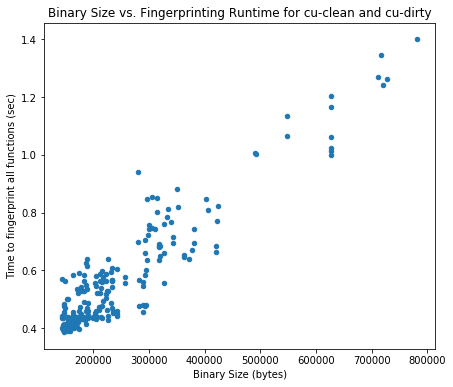

In [162]:
runtimes_df['bin_size'] = [os.path.getsize(x) for x in runtimes_df.index]
runtime_plt = runtimes_df.plot.scatter("bin_size", "runtime", figsize=(7,6), 
                                       title="Binary Size vs. Fingerprinting Runtime for cu-clean and cu-dirty")
runtime_plt.set_xlabel("Binary Size (bytes)")
runtime_plt.set_ylabel("Time to fingerprint all functions (sec)")